In [267]:
import pandas as pd
import numpy as np 
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import missingno as msno
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, chi2,f_classif, mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import RandomizedSearchCV

In [268]:
def prepare_targets(dat):
  le = LabelEncoder()
  le.fit(dat)
  
  return dat

In [269]:
data = pd.read_csv("BankChurners.csv")

In [18]:
#data.select_dtypes(include=['int64', 'float64']).columns # select a subset of the dataframe with the chosen columns subset = df[num_ix]
#data.select_dtypes(include=['object', 'bool']).columns

data



CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [8]:
def pre_process(dat):
    data["Attrition_Flag"] = prepare_targets(dat["Attrition_Flag"])
    return data.iloc[:,1:21]
     

In [20]:
data = pre_process(data)


In [27]:
data.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [23]:
def prepare_inputs(X_train, X_test):
  oe = OrdinalEncoder()
  oe.fit(X_train)
  X_train_enc = oe.transform(X_train)
  X_test_enc = oe.transform(X_test)
  return X_train_enc, X_test_enc

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


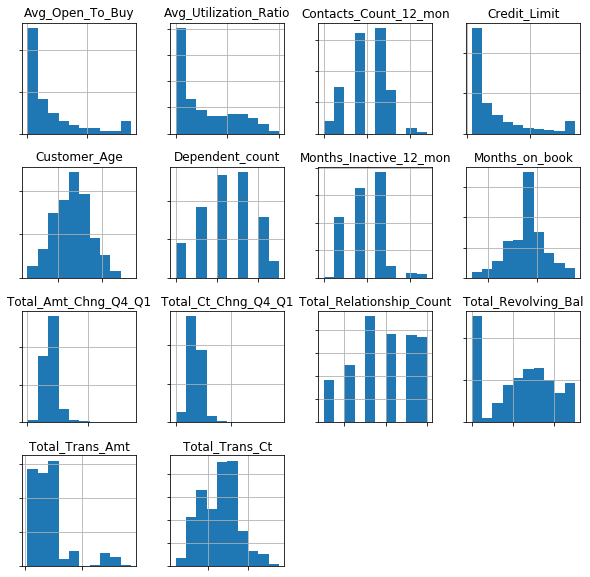

In [28]:
num_ix = data.select_dtypes(include=['int64', 'float64']).columns # select a subset of the dataframe with the chosen columns subset = df[num_ix]

cat_ix = data.select_dtypes(include=['object', 'bool']).columns
# create a histogram plot of each numeric variable
subset = data[num_ix]
ax = subset.hist(figsize = (10,10))
# disable axis labels to avoid the clutter
for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
    
#plt.show()
subset["class"] = data["Attrition_Flag"]


In [31]:
subset1 = data[cat_ix]

subset["class"] = data["Attrition_Flag"]
subset 


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Customer_Age  Dependent_count  Months_on_book  \
0                45                3              39   
1                49                5              44   
2                51                3              36   
3                40                4              34   
4                40                3              21   
...             ...              ...             ...   
10122            50                2              40   
10123            41                2              25   
10124            44                1              36   
10125            30                2              36   
10126            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio              class  
0                    1.625                  0.061  Existing Customer  
1                    3.714                  0.105  Existing Customer  
2                    2.333                  0.000  Existing Customer  
3                    2.333                  0.760  Existing Customer  
4                    2.500                  0.000  Existing Customer  
...                    ...                    ...                ...  
10122                0.857                  0.462  Existing Customer  
10123                0.683                  0.511  Attrited Customer  
10124                0.818                  0.000  Attrited Customer  
10125                0.722                  0.000  Attrited Customer  
10126                0.649                  0.189  Attrited Custom

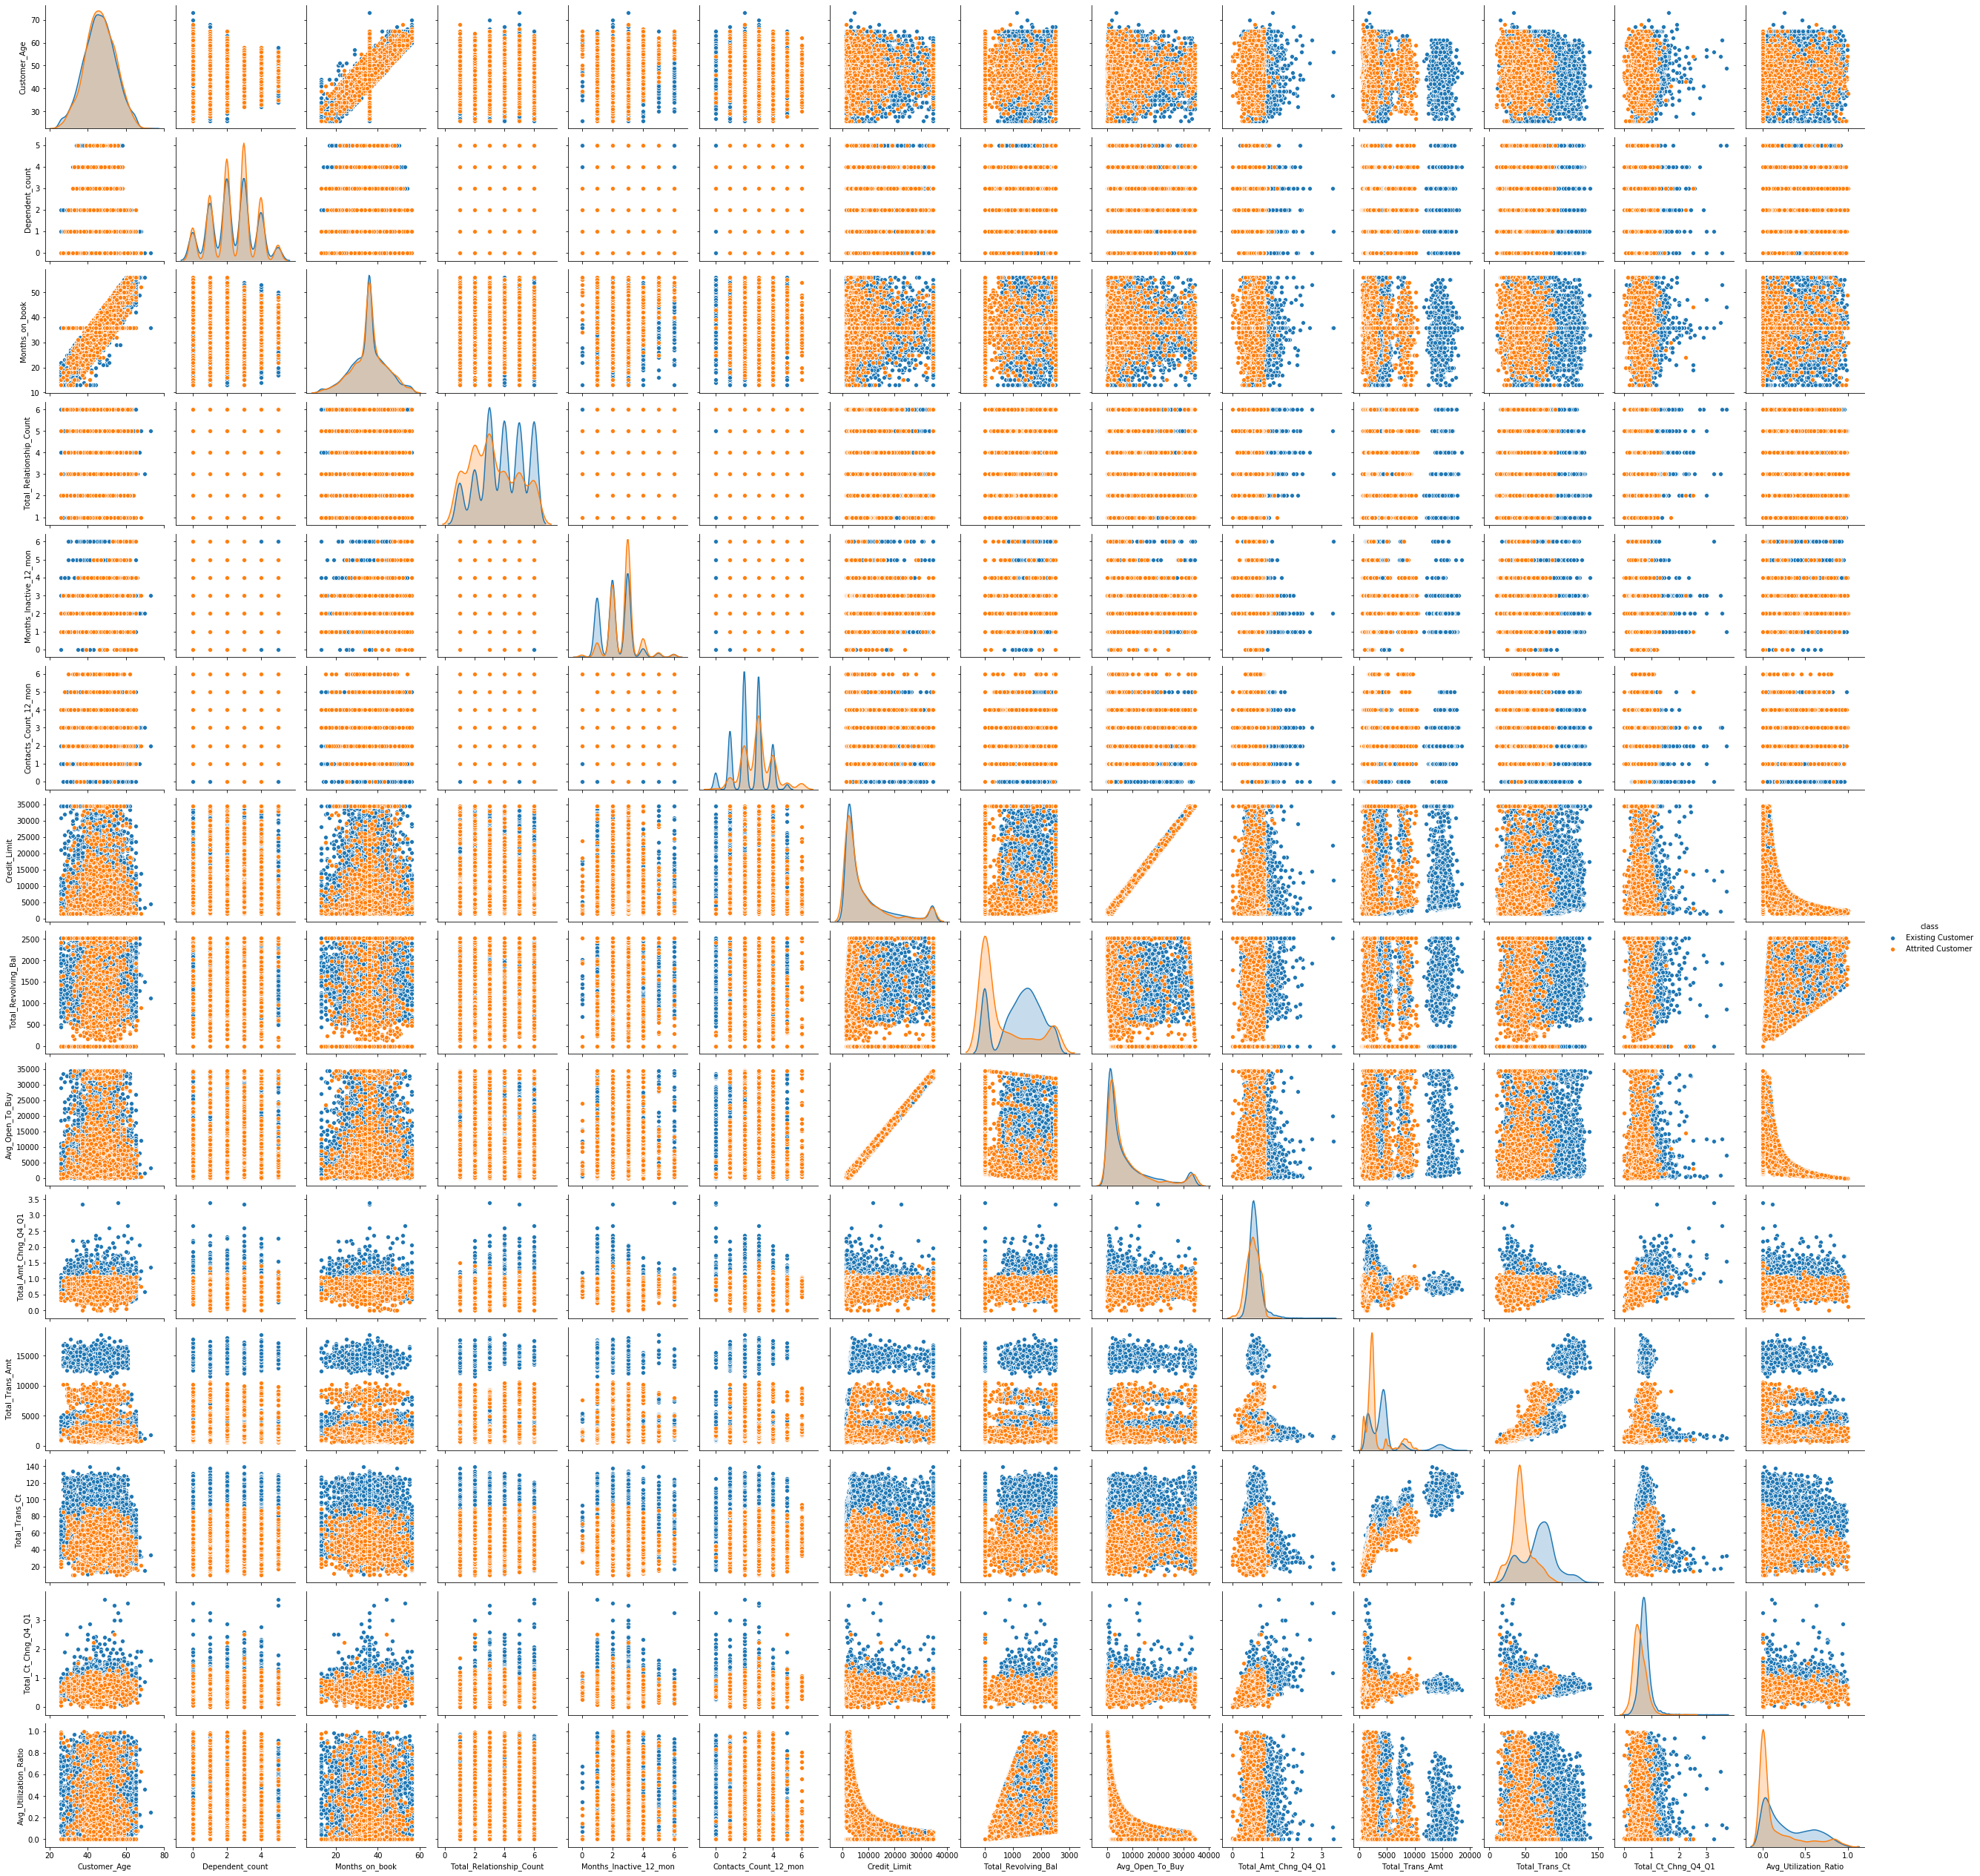

In [30]:
g = sns.pairplot(subset, hue = "class")

plt.show()


In [44]:
selected_from_EDA = [
"Dependent_count", 
"Total_Relationship_Count", 
"Months_Inactive_12_mon", 
"Contacts_Count_12_mon", 
"Total_Revolving_Bal", 
"Total_Trans_Amt",
"Total_Ct_Chng_Q4_Q1",
"Avg_Utilization_Ratio"] 




selected_from_EDA_df = subset[selected_from_EDA]
subset

Customer_Age  Dependent_count  Months_on_book  \
0                45                3              39   
1                49                5              44   
2                51                3              36   
3                40                4              34   
4                40                3              21   
...             ...              ...             ...   
10122            50                2              40   
10123            41                2              25   
10124            44                1              36   
10125            30                2              36   
10126            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio              class  
0                    1.625                  0.061  Existing Customer  
1                    3.714                  0.105  Existing Customer  
2                    2.333                  0.000  Existing Customer  
3                    2.333                  0.760  Existing Customer  
4                    2.500                  0.000  Existing Customer  
...                    ...                    ...                ...  
10122                0.857                  0.462  Existing Customer  
10123                0.683                  0.511  Attrited Customer  
10124                0.818                  0.000  Attrited Customer  
10125                0.722                  0.000  Attrited Customer  
10126                0.649                  0.189  Attrited Custom

Customer_Age: 0.003924188523761973
Dependent_count: 0.00566971881631928
Months_on_book: 0.003822722469728923
Total_Relationship_Count: 0.016257370584999986
Months_Inactive_12_mon: 0.01933789977373901
Contacts_Count_12_mon: 0.027019645723530994
Credit_Limit: 0.006930424049294892
Total_Revolving_Bal: 0.08108949152558775
Avg_Open_To_Buy: 0.021587622450550015
Total_Amt_Chng_Q4_Q1: 0.03149148615126984
Total_Trans_Amt: 0.15856212293064376
Total_Trans_Ct: 0.12019976981522151
Total_Ct_Chng_Q4_Q1: 0.0981085241644839
Avg_Utilization_Ratio: 0.044628483413355235


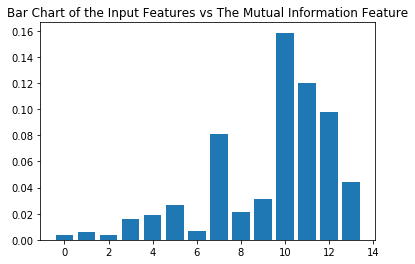

In [49]:
fs1 = SelectKBest(score_func=mutual_info_classif, k=8) # learn relationship from training data
fs1.fit(subset.iloc[:,:14], subset["class"])
for i in range(len(fs1.scores_)): 
    print("{}: {}".format(subset.iloc[:,:14].columns[i],fs1.scores_[i]  ))


    #    print('Feature %d: %f' % (i, fs1.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs1.scores_))], fs1.scores_)
plt.title("Bar Chart of the Input Features vs The Mutual Information Feature")
plt.show()


Customer_Age: 3.356073855235814
Dependent_count: 3.6528251909973544
Months_on_book: 1.897070566574201
Total_Relationship_Count: 233.07288587630256
Months_Inactive_12_mon: 240.91037630257136
Contacts_Count_12_mon: 441.8680500969035
Credit_Limit: 5.773729372944482
Total_Revolving_Bal: 752.7024081839668
Avg_Open_To_Buy: 0.0008228504874729958
Total_Amt_Chng_Q4_Q1: 176.96163776971127
Total_Trans_Amt: 296.22771440129895
Total_Trans_Ct: 1620.1216921748376
Total_Ct_Chng_Q4_Q1: 930.0784162251892
Avg_Utilization_Ratio: 332.8767952985694


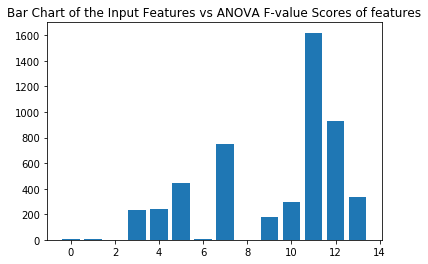

In [50]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k=8) # learn relationship from training data


fs.fit(subset.iloc[:,:14], subset["class"])
for i in range(len(fs.scores_)): 
    #print("{}: ".format(subset.iloc[:,1:] ))
    print("{}: {}".format(subset.iloc[:,:14].columns[i],fs.scores_[i]  ))
    #print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Bar Chart of the Input Features vs ANOVA F-value Scores of features")
plt.show()



In [51]:
selected_from_EDA_set = set(selected_from_EDA)

selected_from_kbest = set(subset.iloc[:,:14].columns[fs.get_support()])
#fs.get_support()


selected_from_mutual = set(subset.iloc[:,:14].columns[fs1.get_support()])

set.intersection(selected_from_kbest,selected_from_EDA_set,selected_from_mutual )



{'Avg_Utilization_Ratio',
 'Contacts_Count_12_mon',
 'Total_Ct_Chng_Q4_Q1',
 'Total_Revolving_Bal',
 'Total_Trans_Amt'}

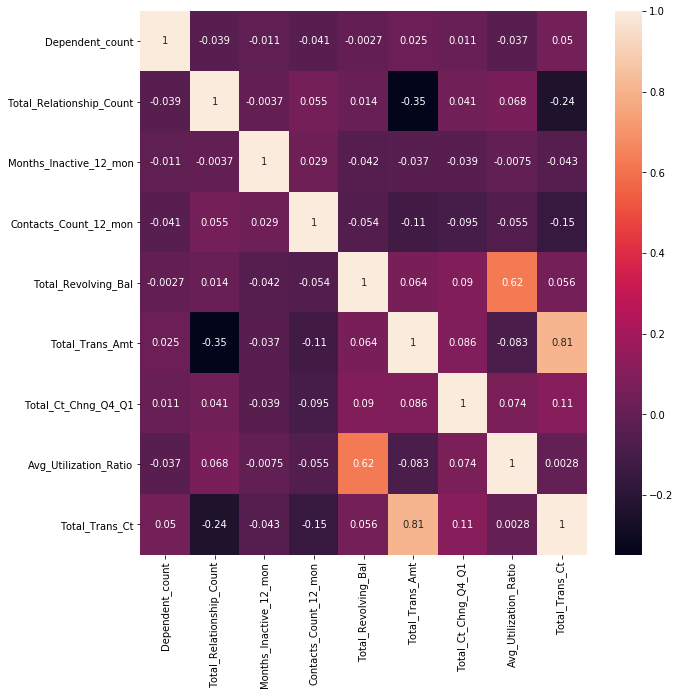

In [42]:
corr = selected_from_EDA_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr,annot=True)

In [43]:
a = np.array([variance_inflation_factor(selected_from_EDA_df.values, i)
     for i in range(len(selected_from_EDA_df.columns))])


#print(a, selected_from_EDA_df.columns)
#selected_from_EDA_df["Total_Trans_Ct"]
#selected_from_EDA_df[a>10]
#selected_from_EDA_df = selected_from_EDA_df.drop(["Total_Trans_Ct"], axis=1)
#df.drop(['B', 'C'], axis=1)

selected_from_EDA_df
a

array([ 3.97818586,  6.78614058,  5.46741017,  5.00052161,  5.03872058,
        8.53196711,  8.63922917,  3.44058267, 21.57699586])

In [300]:
def show_graph(x):
    for i in x.columns:
        if i!="Attrition_Flag":
            sns.kdeplot(x[ (x["Attrition_Flag"]==0)][i])
            sns.kdeplot(x[ (x["Attrition_Flag"]==1)][i] )
            plt.legend(["Not churn","churn"])
            plt.title(i)
    plt.show()


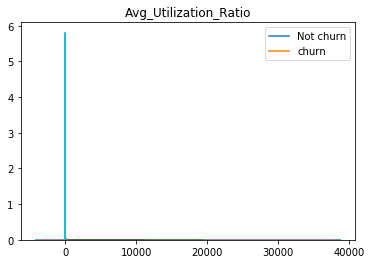

In [301]:
show_graph(subset)

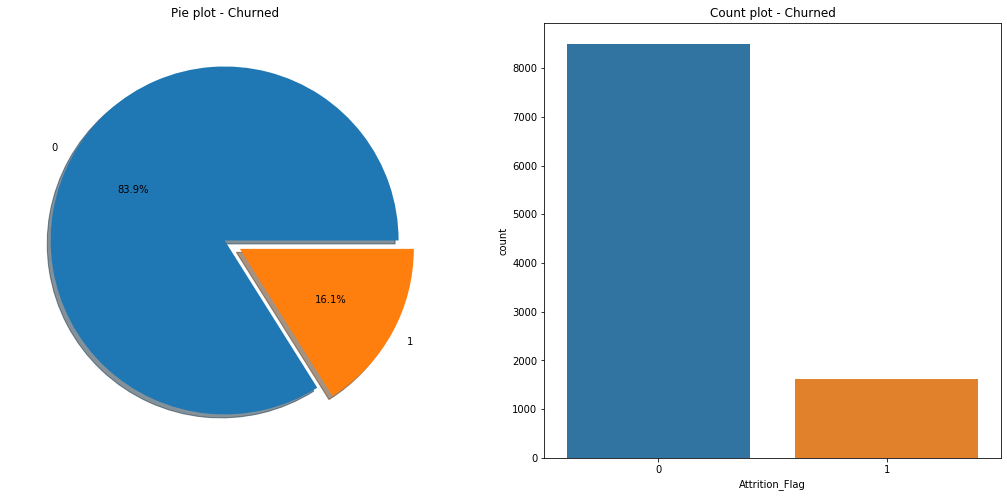

In [295]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data['Attrition_Flag'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Churned')
ax[0].set_ylabel('')
sns.countplot('Attrition_Flag', data=data, ax=ax[1])
ax[1].set_title('Count plot - Churned')

plt.show()

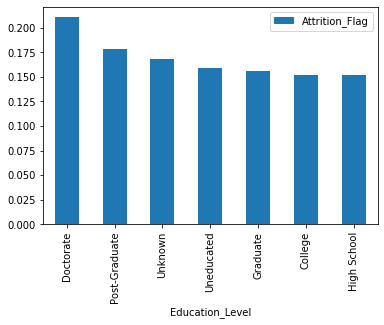

In [111]:
data[['Education_Level', 'Attrition_Flag']].groupby(['Education_Level'], as_index=True).mean().sort_values(by='Attrition_Flag', ascending=False).plot.bar()

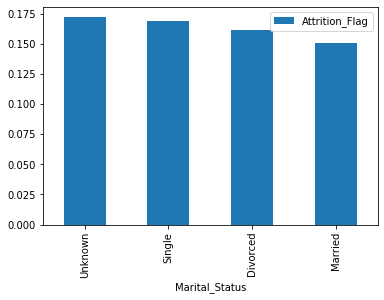

In [113]:
data[['Marital_Status', 'Attrition_Flag']].groupby(['Marital_Status'], as_index=True).mean().sort_values(by='Attrition_Flag', ascending=False).plot.bar()

In [49]:
Counter(data[""])

Counter({1144: 2,
         1291: 4,
         1887: 4,
         1171: 1,
         816: 1,
         1088: 3,
         1330: 3,
         1538: 2,
         1350: 2,
         1441: 4,
         1201: 2,
         1314: 2,
         1539: 4,
         1311: 3,
         1570: 5,
         1348: 3,
         1671: 2,
         1028: 2,
         1336: 4,
         1207: 2,
         1178: 2,
         692: 1,
         931: 1,
         1126: 2,
         1110: 3,
         1051: 1,
         1197: 2,
         1904: 5,
         1052: 4,
         1045: 1,
         1038: 1,
         1596: 4,
         1589: 2,
         1411: 2,
         1407: 3,
         1877: 4,
         966: 1,
         1464: 2,
         704: 1,
         1109: 1,
         1347: 3,
         1756: 5,
         1042: 1,
         1444: 1,
         1741: 4,
         1719: 2,
         1217: 4,
         1140: 2,
         1878: 2,
         705: 2,
         1946: 3,
         1414: 3,
         602: 1,
         1295: 2,
         1424: 4,
         1359: 2,

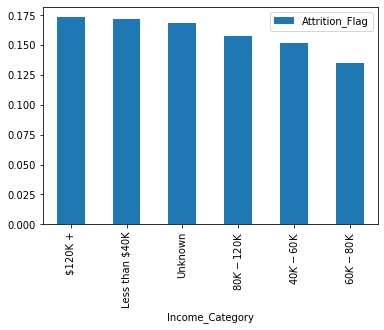

In [114]:
data[['Income_Category', 'Attrition_Flag']].groupby(['Income_Category'], as_index=True).mean().sort_values(by='Attrition_Flag', ascending=False).plot.bar()

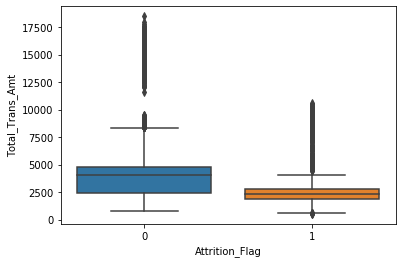

In [120]:
x = sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt", data=data,)

In [121]:
def show_boxplot(x):
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    for i in x.columns:
        if i!="Attrition_Flag":
            sns.boxplot(x="Attrition_Flag", y=i, data=data,)
            
            plt.legend(["Not churn","churn"])
            plt.title(i)
            plt.show()

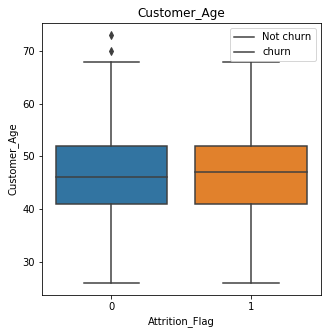

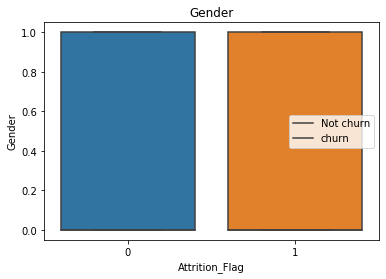

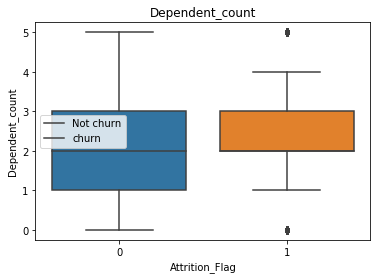

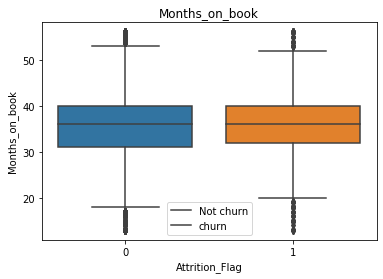

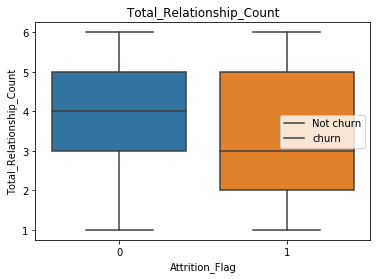

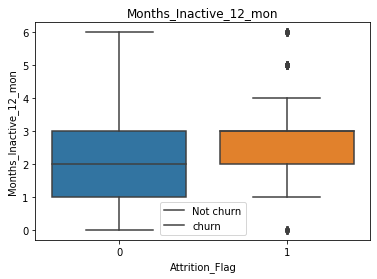

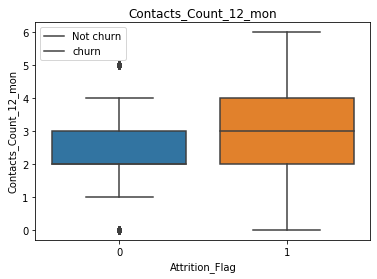

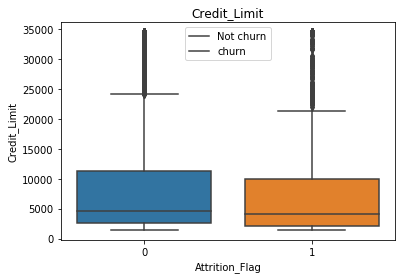

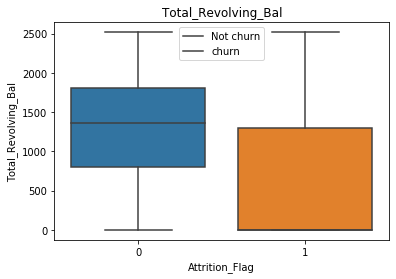

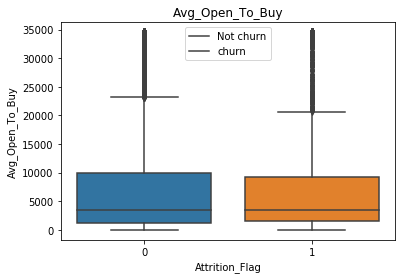

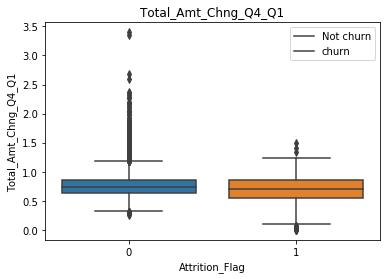

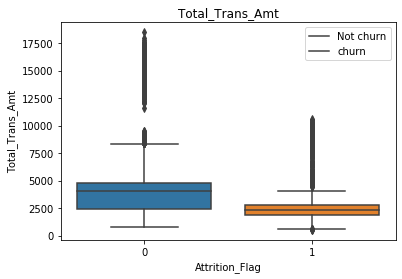

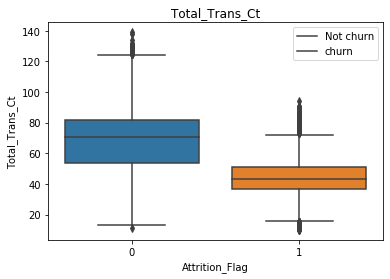

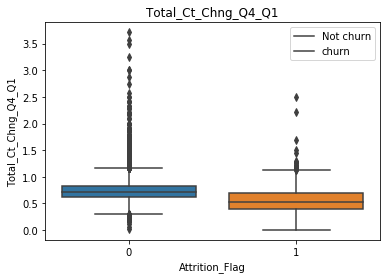

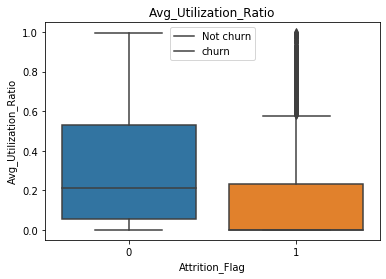

In [122]:
show_boxplot(subset)

In [70]:

#g = sns.boxplot(x ="Attrition_Flag", y= subset.drop(["Attrition_Flag"],axis=1) , data = subset)
#plt.show()
subset.drop(["Attrition_Flag"],axis=1)

Customer_Age  Gender  Dependent_count  Months_on_book  \
0                45       1                3              39   
1                49       0                5              44   
2                51       1                3              36   
3                40       0                4              34   
4                40       1                3              21   
...             ...     ...              ...             ...   
10122            50       1                2              40   
10123            41       1                2              25   
10124            44       0                1              36   
10125            30       1                2              36   
10126            43       0                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0                    1.625                  0.061  
1                    3.714                  0.105  
2                    2.333                  0.000  
3                    2.333                  0.760  
4                    2.500                  0.000  
...                    ...                    ...  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[10127 rows x 15 columns]

In [123]:
data.select_dtypes(include=['object', 'bool']).columns

Index(['Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

0
0
1
1
2
2
3
3
4
4


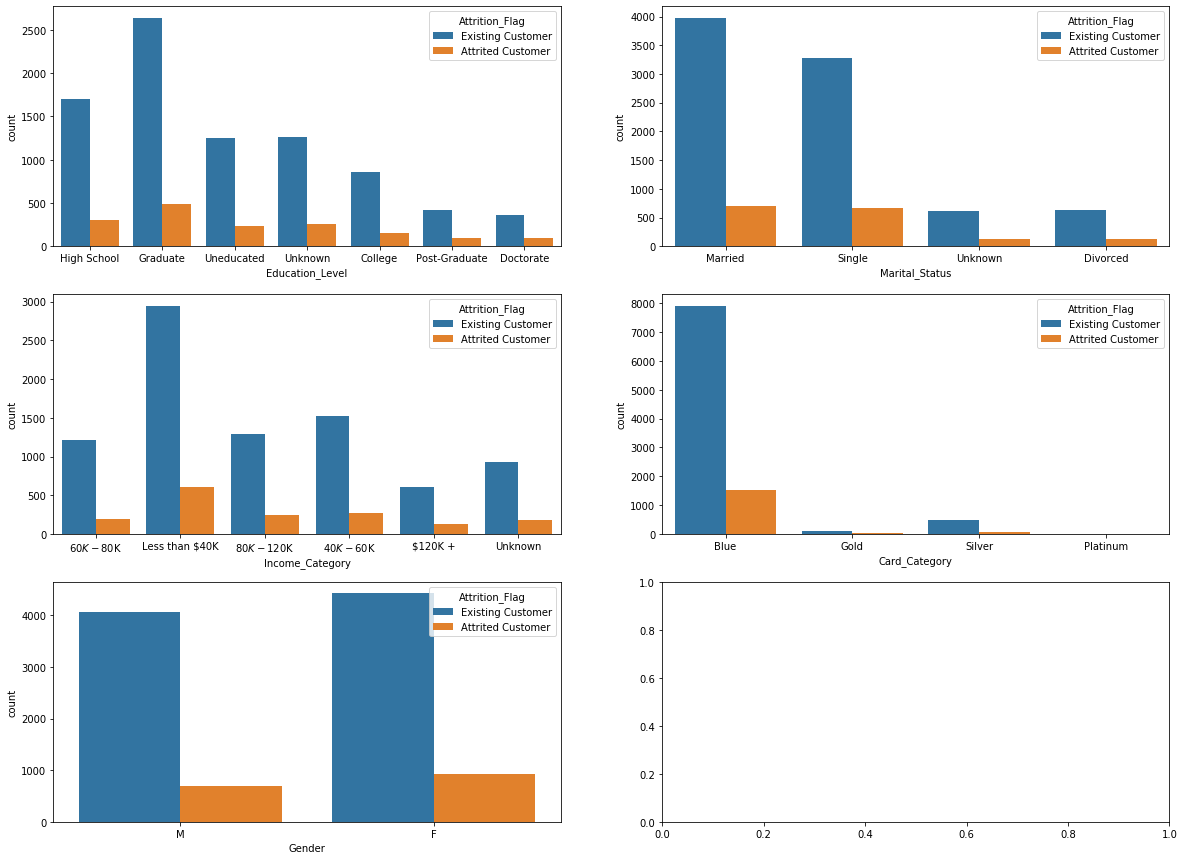

In [55]:
fig, ax = plt.subplots(3,2,figsize=(20,15))


sns.countplot(x= "Education_Level", hue="Attrition_Flag", data=data, ax= ax[0,0])
sns.countplot(x= "Marital_Status", hue="Attrition_Flag", data=data,ax=ax[0,1])

sns.countplot(x= "Income_Category", hue="Attrition_Flag", data=data,ax=ax[1,0])
sns.countplot(x= "Card_Category", hue="Attrition_Flag", data=data,ax=ax[1,1])
sns.countplot(x= "Gender", hue="Attrition_Flag", data=data,ax=ax[2,0])


plt.show()

In [58]:
def prepare_inputs(dat):
  oe = OrdinalEncoder()
  oe.fit(dat)
  return oe.transform(dat)


In [63]:
encoded_subset1 = prepare_inputs(subset1.iloc[:,1:])


In [67]:
subset1

Attrition_Flag Gender Education_Level Marital_Status  \
0      Existing Customer      M     High School        Married   
1      Existing Customer      F        Graduate         Single   
2      Existing Customer      M        Graduate        Married   
3      Existing Customer      F     High School        Unknown   
4      Existing Customer      M      Uneducated        Married   
...                  ...    ...             ...            ...   
10122  Existing Customer      M        Graduate         Single   
10123  Attrited Customer      M         Unknown       Divorced   
10124  Attrited Customer      F     High School        Married   
10125  Attrited Customer      M        Graduate        Unknown   
10126  Attrited Customer      F        Graduate        Married   

      Income_Category Card_Category  
0         $60K - $80K          Blue  
1      Less than $40K          Blue  
2        $80K - $120K          Blue  
3      Less than $40K          Blue  
4         $60K - $80K          Blue  
...               ...           ...  
10122     $40K - $60K          Blue  
10123     $40K - $60K          Blue  
10124  Less than $40K          Blue  
10125     $40K - $60K          Blue  
10126  Less than $40K        Silver  

[10127 rows x 6 columns]

Gender: 7.443222703819398
Education_Level: 0.3392311085719142
Marital_Status: 1.302754507875668
Income_Category: 2.4751695891254286
Card_Category: 0.9861202181847561


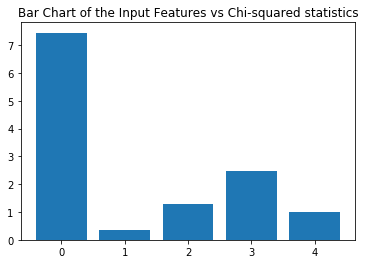

In [73]:
#Chi-Squared Feature Selection 

fs2 = SelectKBest(score_func=chi2, k='all') 
fs2.fit(encoded_subset1, subset["class"])

for i in range(len(fs2.scores_)):
    print("{}: {}".format(subset1.iloc[:,1:].columns[i],fs2.scores_[i] ))

    #print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs2.scores_))], fs2.scores_)
plt.title("Bar Chart of the Input Features vs Chi-squared statistics")
plt.show()



Gender: 0.009816028194066018
Education_Level: 0.0
Marital_Status: 0.003874473707356607
Income_Category: 0.0037998900934101965
Card_Category: 0.0


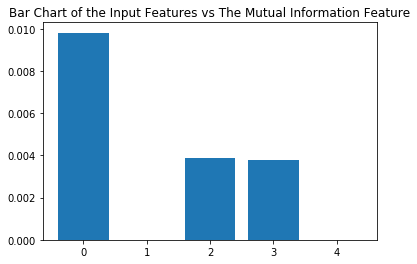

In [76]:
#Mutual Information Feature Selection 

fs3 = SelectKBest(score_func=mutual_info_classif, k='all') 
fs3.fit(encoded_subset1, subset["class"])

for i in range(len(fs3.scores_)):
    print("{}: {}".format(subset1.iloc[:,1:].columns[i],fs3.scores_[i] ))
    
# plot the scores
plt.bar([i for i in range(len(fs3.scores_))], fs3.scores_)
plt.title("Bar Chart of the Input Features vs The Mutual Information Feature")

plt.show()

In [270]:
features_selected = list(set.intersection(selected_from_kbest,selected_from_EDA_set,selected_from_mutual ))

features_selected.append("Gender",)


In [271]:
X = data[features_selected]

In [272]:
y = data["Attrition_Flag"]

In [273]:
dic2 = {"F" : 0, "M":1}

X["Gender"] = X["Gender"].map(dic2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [274]:
numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns
numerical_ix
categorical_ix

Index([], dtype='object')

In [275]:
ct = ColumnTransformer(
[("cat", OneHotEncoder(), categorical_ix),
("num", MinMaxScaler(), numerical_ix)])


In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


Total_Trans_Amt  Total_Revolving_Bal  Total_Ct_Chng_Q4_Q1  \
6641             4587                 2332                0.745   
1302             1378                 1047                0.429   
5825             3511                    0                0.882   
1495             2413                 1590                0.708   
3342             4630                 1582                0.644   
...               ...                  ...                  ...   
2895             1976                 1319                0.750   
7813             4268                 1392                0.667   
905               940                    0                0.471   
5192             4193                 1587                0.881   
235              1512                 1301                1.455   

      Avg_Utilization_Ratio  Contacts_Count_12_mon  Gender  
6641                  0.068                      2       1  
1302                  0.030                      3       1  
5825                  0.000                      3       0  
1495                  0.094                      4       1  
3342                  0.114                      4       1  
...                     ...                    ...     ...  
2895                  0.116                      4       1  
7813                  0.647                      2       0  
905                   0.000                      1       1  
5192                  0.621                      2       0  
235                   0.147                      2       1  

[8101 rows x 6 columns]

In [278]:
X_train = ct.fit_transform(X_train)

In [279]:
X_test = ct.fit_transform(X_test)

In [183]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
Counter(y_train)

Counter({'Existing Customer': 6805, 'Attrited Customer': 6805})

In [217]:
# logistic regression
clf = LogisticRegression(solver = "liblinear", random_state=0)
clf.fit(X_train, y_train)
log_pred = clf.predict(X_test)
print("f2 testing error = ", f2_measure(y_test,log_pred))

f2 testing error =  0.5606936416184971


In [208]:
#knn
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)
neigh_pred =neigh.predict(X_test)
print("f2 testing error = ", f2_measure(y_test,neigh_pred))

f2 testing error =  0.7257617728531857


In [209]:
# GNB 
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
print("f2 testing error = ", f2_measure(y_test,gnb_pred))

f2 testing error =  0.5699621826039979


In [212]:
#SVM 
clf = svm.SVC()
clf.fit(X_train, y_train)
svm_pred = clf.predict(X_test)
print("f2 testing error = ", f2_measure(y_test,svm_pred))

f2 testing error =  0.6778741865509762


In [213]:
#Neural Network
clf = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=5000)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print("f2 testing error = ", f2_measure(y_test,clf_pred))

f2 testing error =  0.7336799537839399


In [214]:
#Adaboost 
clf = AdaBoostClassifier(n_estimators=105, random_state=0)
clf.fit(X_train, y_train)
ada_pred = clf.predict(X_test)
print("f2 testing error = ", f2_measure(y_test,ada_pred))

f2 testing error =  0.7412790697674418


In [215]:
#Random Forest

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
rf_pred = clf.predict(X_test)
print("f2 testing error = ", f2_measure(y_test,rf_pred))


f2 testing error =  0.7147165259348613


In [201]:
def f2_measure(y_true, y_pred):
  return fbeta_score(y_true, y_pred, beta=2,pos_label="Attrited Customer")

In [114]:
# evaluate a model
def evaluate_model(X, y, model):
  # define evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # define the model evaluation metric
  metric = make_scorer(f2_measure)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
  return scores

In [ ]:
# fit the pipeline on the transformed data
pipeline.fit(X_train, y_train)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1) score = mean(scores)


In [283]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(("AdaBoost", AdaBoostClassifier()))
models.append(("RandomForest", RandomForestClassifier()))
models.append(("Neural Network",MLPClassifier() ))

In [281]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="f1_micro")
  results.append(cv_results)
  names.append(name)
  print("{}: , mean = {}, std = {}".format(name, cv_results.mean(), cv_results.std()))

LR: , mean = 0.875326452634303, std = 0.01245263673546644
LDA: , mean = 0.8775486748565253, std = 0.013288005082936018
KNN: , mean = 0.908899849294424, std = 0.008390764141556916
CART: , mean = 0.891618943234233, std = 0.011651199389388845
NB: , mean = 0.8680421975613097, std = 0.010229949758416616
SVM: , mean = 0.8465636084090666, std = 0.010895851367850864
AdaBoost: , mean = 0.919516372105768, std = 0.00936408751752183
RandomForest: , mean = 0.9271700841820036, std = 0.007421632185713175


/Users/byongwookkim/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/byongwookkim/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/byongwookkim/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/byongwookkim/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Use

Neural Network: , mean = 0.8923615107092295, std = 0.014924011383366239


/Users/byongwookkim/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


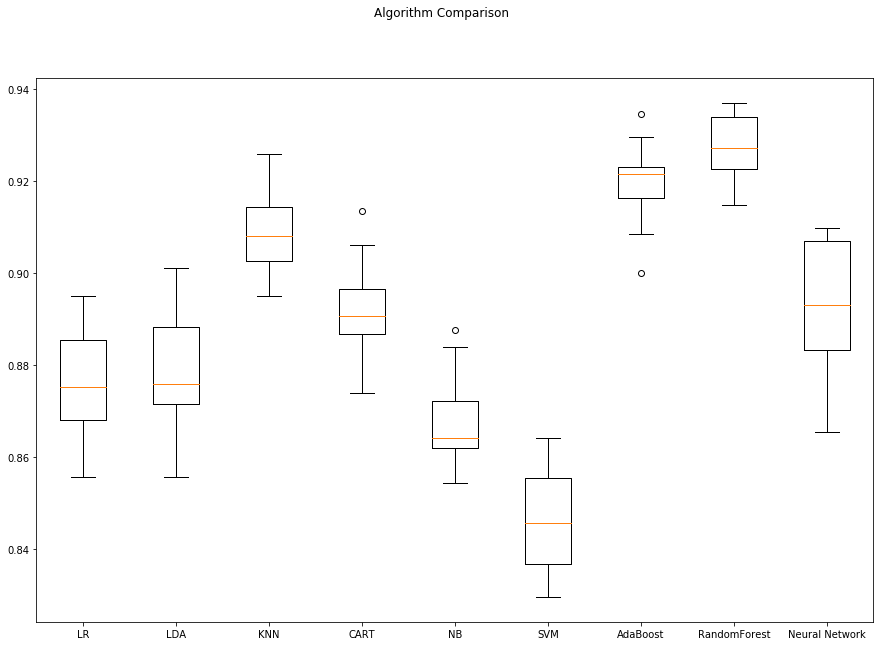

In [284]:
fig = plt.figure(figsize=(15,10)) 
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [237]:
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier(euclidean)
kfold = KFold(n_splits=10, random_state=9, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="f1_micro", cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.941954 using {'n_neighbors': 1}


In [251]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [259]:
param_grid = {'n_estimators': n_estimators}
print(random_grid)
rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3)
rf_Grid.fit(X_train, y_train)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


KeyboardInterrupt: 

In [256]:
print("rf_Grid.best_params_:", rf_Grid.best_params_)
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

rf_Grid.best_params_: {'n_estimators': 72}
Train Accuracy - : 1.000
Test Accuracy - : 0.905


In [264]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]


param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3)
rf_Grid.fit(X_train, y_train)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]})

In [265]:
print("rf_Grid.best_params_:", rf_Grid.best_params_)
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

rf_Grid.best_params_: {'bootstrap': False, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 48}
Train Accuracy - : 0.861
Test Accuracy - : 0.883


In [266]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
cv_results = cross_val_score(RandomForestClassifier(n_estimators = 72), X_train, y_train, cv=kfold, scoring="f1_micro")
#results.append(cv_results)
#names.append(name)
print("Random Forest: , mean = {}, std = {}".format(cv_results.mean(), cv_results.std()))

Random Forest: , mean = 0.9402645113886848, std = 0.003916313878394245
